In [1]:
# KNN Classification
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/KNN/main/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [5]:
# remove row number 39
data = data.drop(index=39)
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


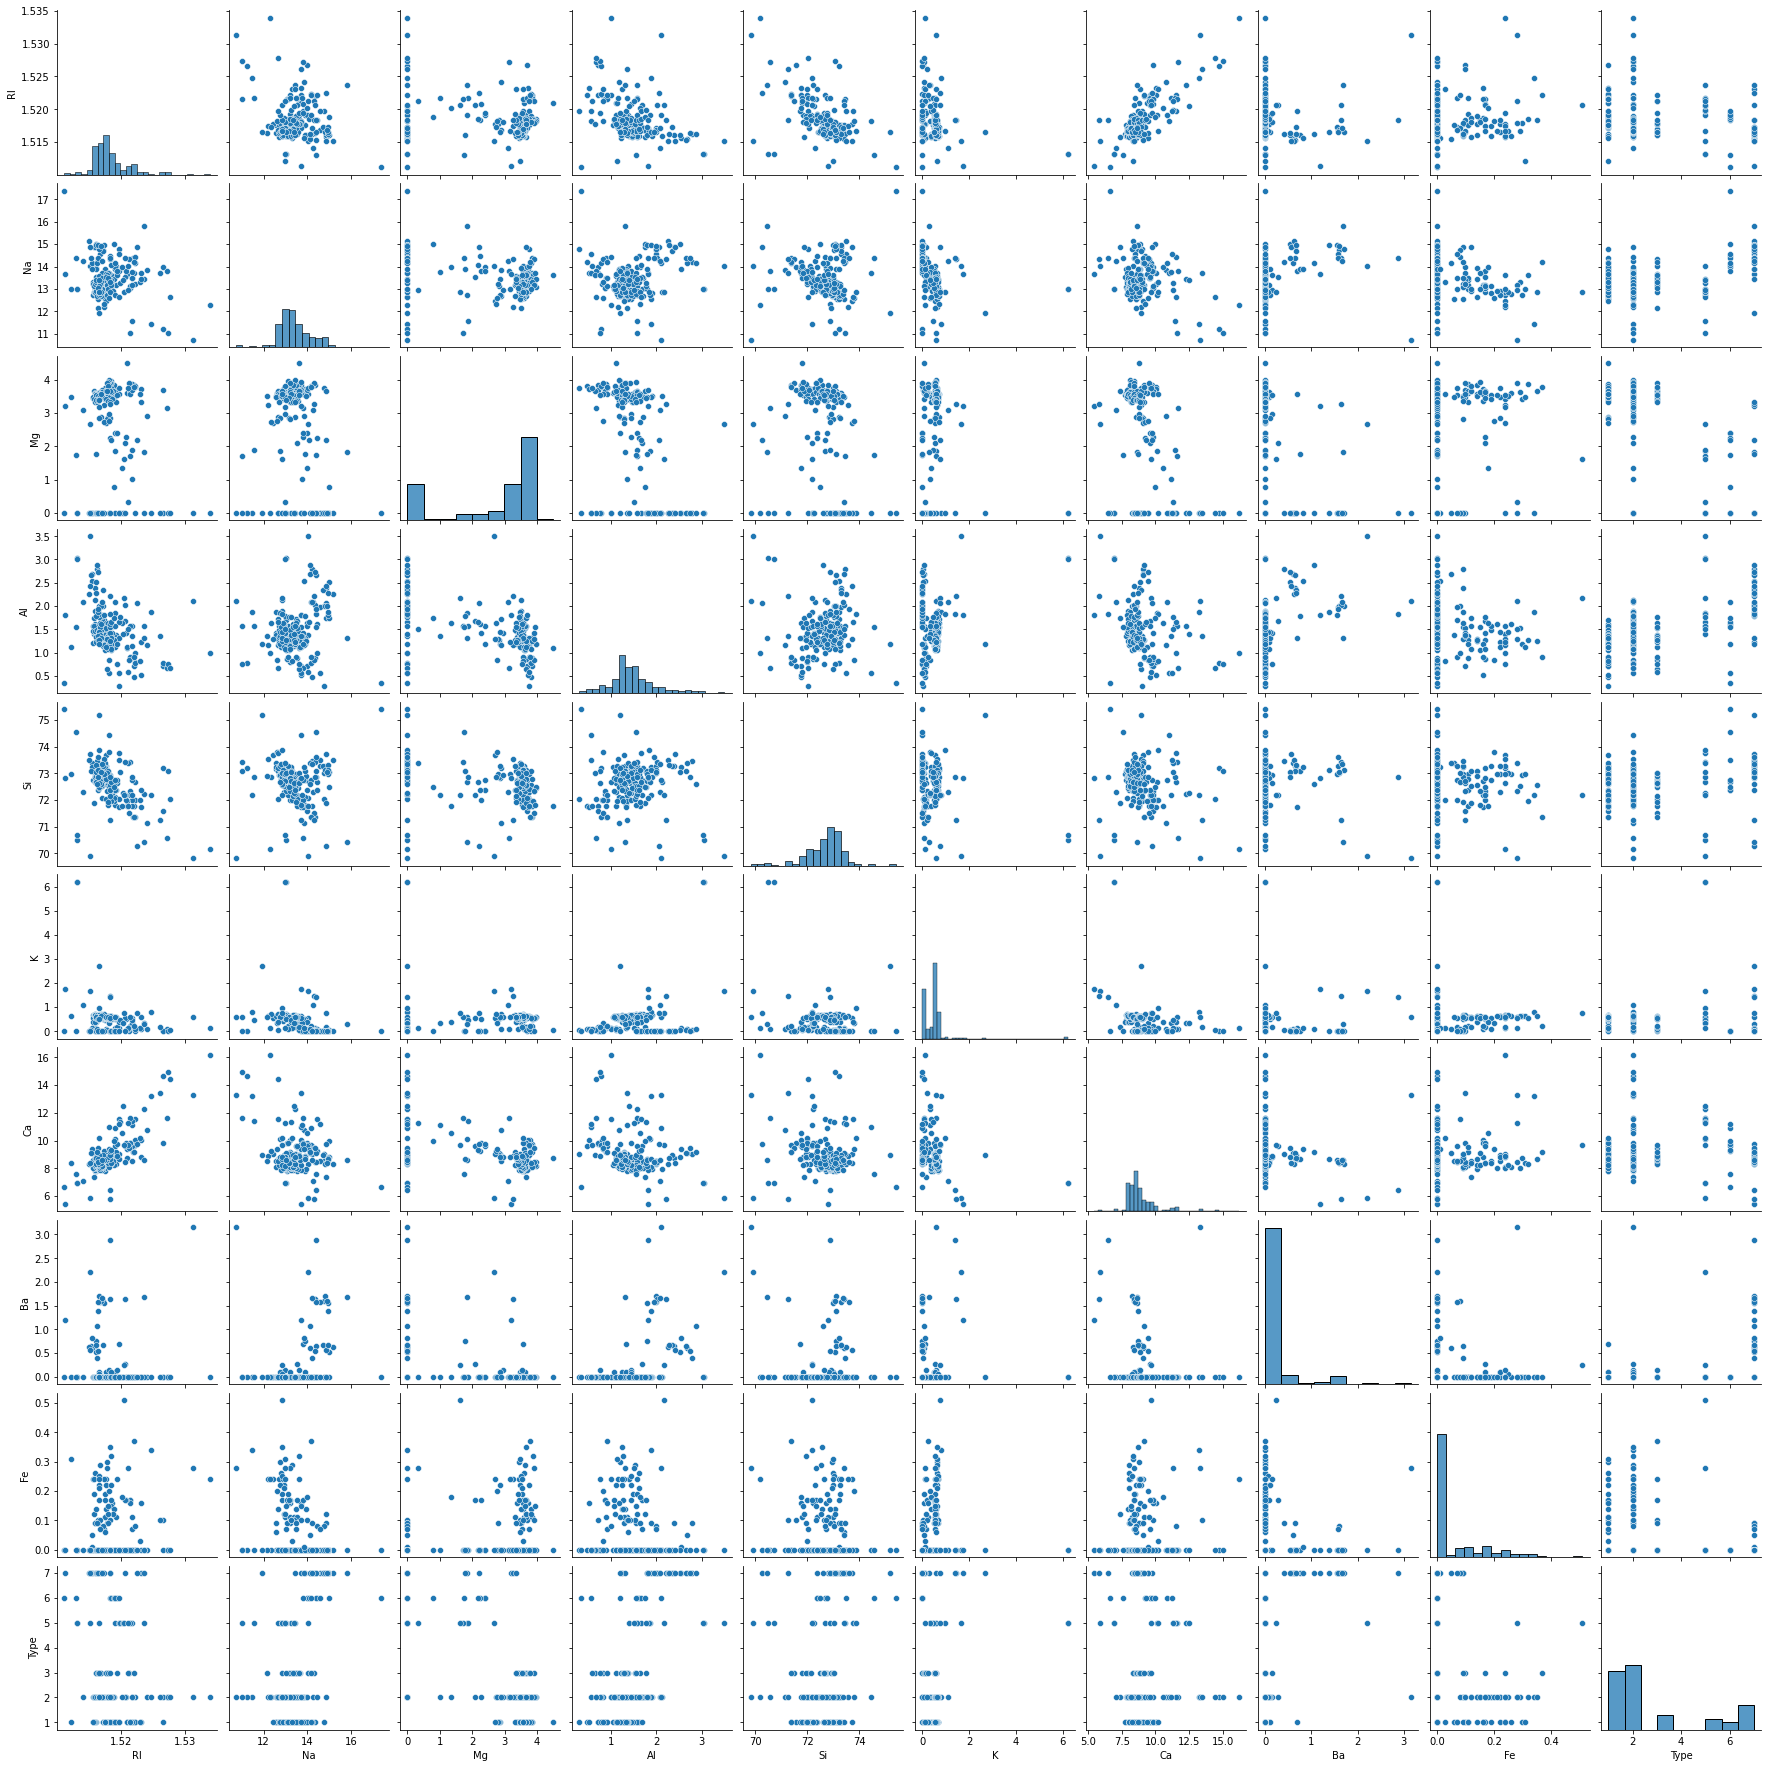

In [6]:
sns.pairplot(data)

In [7]:
data.corr()
# Columns don't seems to be following Linear Co-rrelation 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


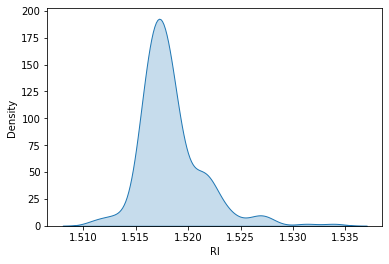

In [8]:
sns.kdeplot(data.RI,shade='fill')

In [9]:
X = data.iloc[:, 0:9]
Y = data.iloc[:, -1] # -1 means last column

In [10]:
model = KNeighborsClassifier(n_neighbors = 12)

In [11]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [12]:
# Using Kfold for average accuracy
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv = kfold)

In [13]:
results

array([0.5       , 0.81818182, 0.72727273, 0.9047619 , 0.19047619,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [14]:
results.mean()

0.4283549783549784

In [15]:
#Accuracy is low.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [17]:
model = KNeighborsClassifier(n_neighbors = 8)

In [18]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [19]:
# Using Kfold for average accuracy
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv = kfold)

In [20]:
results

array([0.66666667, 0.46666667, 0.66666667, 0.46666667, 0.6       ,
       0.73333333, 0.53333333, 0.73333333, 0.73333333, 0.64285714])

In [21]:
results.mean()

0.6242857142857143

In [22]:
n_neighbors = list(range(1,41))
parameters = {'n_neighbors' : n_neighbors}

In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [24]:
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


In [25]:
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

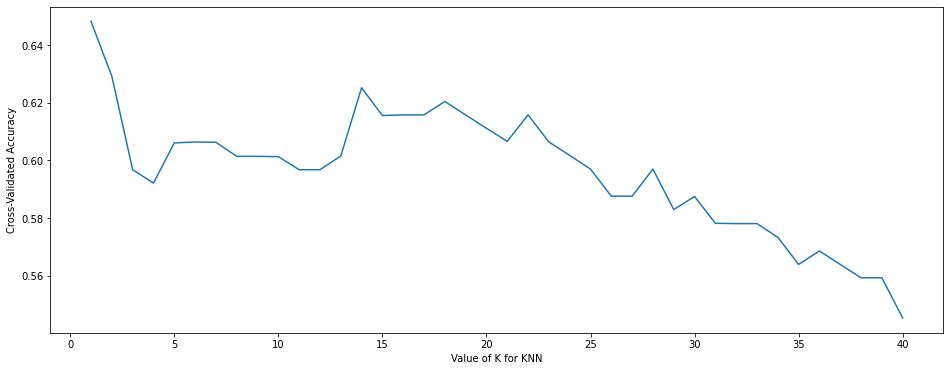

In [26]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [27]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,41),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.648283
1,2,0.629236
2,3,0.596788
3,4,0.592137
4,5,0.606091
5,6,0.606423
6,7,0.606312
7,8,0.601440
8,9,0.601440
9,10,0.601329


In [28]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,0.648283
1,2,0.629236
13,14,0.625249
17,18,0.620487
21,22,0.615836
18,19,0.615836
16,17,0.615836
15,16,0.615836
14,15,0.615615
19,20,0.611185


In [29]:
#After use of GridSearchCV we can use the top 4 values(1,2,14,18) for our model as it gives us better accuracy

In [30]:
model = KNeighborsClassifier(n_neighbors = 1)

In [31]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=1)

In [32]:
model.predict([[1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])